## Tutorial 01
### Basic image processing techniches

In [4]:
import cv2
import imutils
import argparse
from google.colab.patches import cv2_imshow
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

ZIP_FILE_PATH = '/content/drive/MyDrive/Colab\ Notebooks/Datasets/cityscapes.zip'
UNZIP_PATH = '/content/datasets/cityscapes/'

os.makedirs(UNZIP_PATH, exist_ok=True)
!unzip -q $ZIP_FILE_PATH -d $UNZIP_PATH

<>:3: SyntaxWarning: invalid escape sequence '\ '
<>:3: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-2125919586.py:3: SyntaxWarning: invalid escape sequence '\ '
  ZIP_FILE_PATH = '/content/drive/MyDrive/Colab\ Notebooks/Datasets/cityscapes.zip'


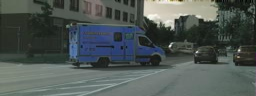

Height: 96  Width: 256  Channels: 3


In [ ]:
img = cv2.imread('/content/datasets/cityscapes/train/img/train215.png')
(height, width, channels) = img.shape
cv2_imshow(img)
print(f"Height: {height}  Width: {width}  Channels: {channels}")

In [ ]:
(blue, green, red) = img[30, 7]
cv2_imshow(img[30, 7])
print(f"Blue: {blue}  Green: {green}  Red: {red}")

Blue: 40  Green: 49  Red: 44


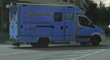

Height: 60  Width: 110  Channels: 3


In [ ]:
# Extract Region Of Interest (ROI)
roi_img = img[20:80, 60:170]
cv2_imshow(roi_img)
(height, width, channels) = roi_img.shape
print(f"Height: {height}  Width: {width}  Channels: {channels}")

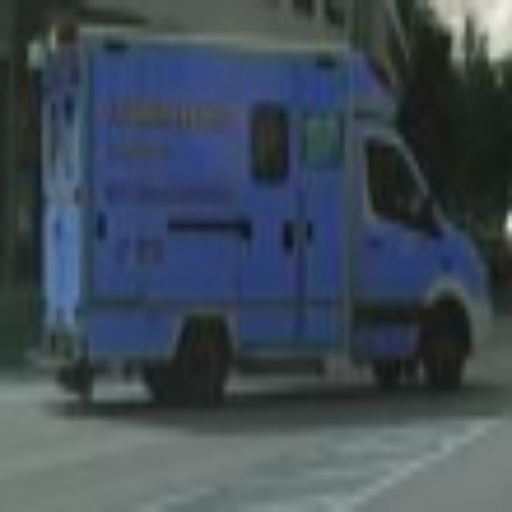

(512, 512, 3)


In [ ]:
# Image resizing
resized_img = cv2.resize(roi_img, (512, 512))
cv2_imshow(resized_img) # distorted image
print(resized_img.shape)

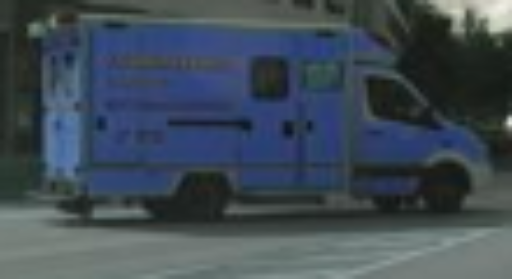

(279, 512, 3)


In [ ]:
# use aspect ratio of the image to create a non-distored resized image
ratio = 512 / width
dim = (512, int(height * ratio))
resized_img = cv2.resize(roi_img, dim)
cv2_imshow(resized_img)
print(resized_img.shape)

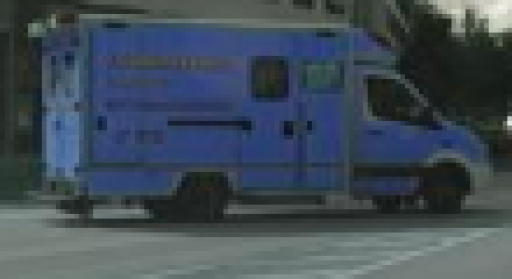

(279, 512, 3)


In [ ]:
# 2nd option to resize image while preserving aspect ratio
resized_img = imutils.resize(roi_img, width = 512)
cv2_imshow(resized_img)
print(resized_img.shape)

45 degree


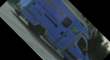

-45 degree


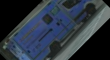

90 degree


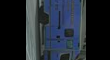

-90 degree


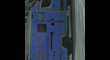

180 degree


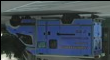

-180 degree


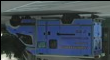

360 degree


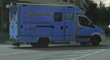

-360 degree


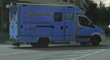

In [ ]:
# Image rotation
# Positive angles are specified in negative values and negative anlges in
# positive values as per the geometric principle of a unit circle
img_center = (width // 2, height // 2)
for angle in [-45, 45, -90, 90, -180, 180, -360, 360]:
  M = cv2.getRotationMatrix2D(img_center, angle, 1.0)
  rotated_img = cv2.warpAffine(roi_img, M, (width, height))
  print(f"{-1 * angle} degree")
  cv2_imshow(rotated_img)

45 degree


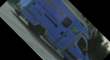

-45 degree


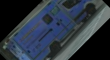

90 degree


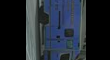

-90 degree


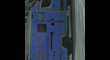

180 degree


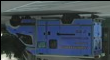

-180 degree


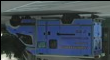

360 degree


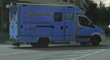

-360 degree


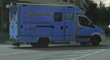

In [ ]:
# 2nd option
for angle in [-45, 45, -90, 90, -180, 180, -360, 360]:
  rotated_img = imutils.rotate(roi_img, angle)
  print(f"{-1 * angle} degree")
  cv2_imshow(rotated_img)

45 degree


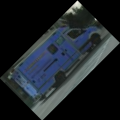

-45 degree


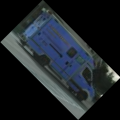

90 degree


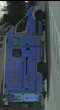

-90 degree


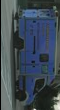

180 degree


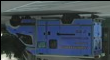

-180 degree


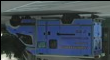

360 degree


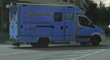

-360 degree


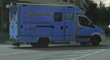

In [ ]:
# 3rd option
# To not clip the image while rotating
for angle in [-45, 45, -90, 90, -180, 180, -360, 360]:
  rotated_img = imutils.rotate_bound(roi_img, angle)
  print(f"{-1 * angle} degree")
  cv2_imshow(rotated_img)

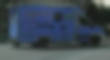

In [ ]:
# Image smoothening by blurring it
blurred_img = cv2.GaussianBlur(roi_img, (11, 11), 0)
cv2_imshow(blurred_img)

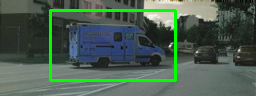

In [ ]:
# Writing/drawing on an image
# Rectangle box
img_copy_1 = img.copy()
cv2.rectangle(img_copy_1, (50, 10), (175, 80), (0, 255, 0), 2)
cv2_imshow(img_copy_1)

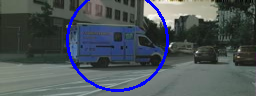

In [ ]:
# Circle
img_copy_2 = img.copy()
cv2.circle(img_copy_2, (117, 40), 50, (255, 0, 0), 2)
cv2_imshow(img_copy_2)

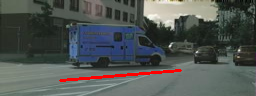

In [ ]:
# line
img_copy_3 = img.copy()
cv2.line(img_copy_3, (60, 80), (180, 70), (0, 0, 255), 2)
cv2_imshow(img_copy_3)

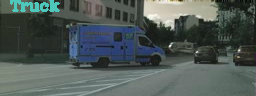

In [ ]:
# Text on an image
img_copy_4 = img.copy()
cv2.putText(img_copy_4, "Truck", (10, 10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (187, 200, 77), 2)
cv2_imshow(img_copy_4)

## Tutorial 02

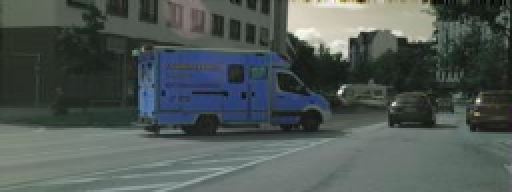

(192, 512, 3)


In [6]:
img = cv2.imread('/content/datasets/cityscapes/train/img/train215.png')
resized_img = imutils.resize(img, width = 512)
cv2_imshow(resized_img)
print(resized_img.shape)

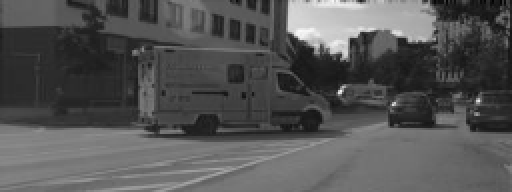

(192, 512)


In [7]:
# Convert image to greyscale
greyscale_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(greyscale_img)
print(greyscale_img.shape)

Edge detected along X axis


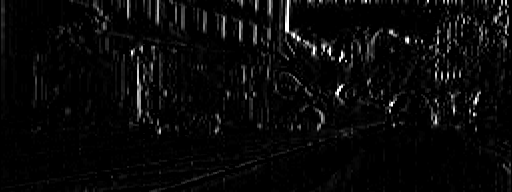

Edge detected along Y axis


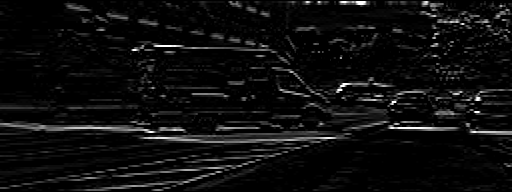

Edge detected along both X and Y axis


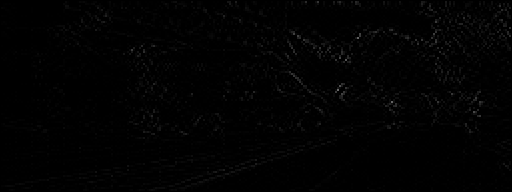

In [16]:
# Sobel edge detection algorithm
sobel_img_x = cv2.Sobel(src = greyscale_img, ddepth = cv2.CV_64F, dx = 1, dy = 0, ksize = 3)
sobel_img_y = cv2.Sobel(src = greyscale_img, ddepth = cv2.CV_64F, dx = 0, dy = 1, ksize = 3)
sobel_img_xy = cv2.Sobel(src = greyscale_img, ddepth = cv2.CV_64F, dx = 1, dy = 1, ksize = 3)

print("Edge detected along X axis")
cv2_imshow(sobel_img_x)
print("Edge detected along Y axis")
cv2_imshow(sobel_img_y)
print("Edge detected along both X and Y axis")
cv2_imshow(sobel_img_xy)